In [1]:
import pandas as pd
df = pd.read_csv('Citywide_Payroll_Data__Fiscal_Year_.csv')
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("-", "_")
df.columns = df.columns.str.lower()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

/Users/areena.arora/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df.head(3)

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2017,NaN,ADMIN FOR CHILDREN'S SVCS,AARON,TERESA,NaN,03/21/2016,BRONX,CHILD PROTECTIVE SPECIALIST,ACTIVE,"51,315.00",per Annum,"1,825.00","51,709.59",588.00,"22,374.31",639.66
1,2017,NaN,ADMIN FOR CHILDREN'S SVCS,AARONS,CAMELIA,M,08/08/2016,BROOKLYN,CHILD PROTECTIVE SPECIALIST,ACTIVE,"51,315.00",per Annum,"1,595.55","41,960.18",121.75,"3,892.19",108.25
2,2017,NaN,ADMIN FOR CHILDREN'S SVCS,ABDUL,MODUPE,NaN,02/11/2008,BROOKLYN,CHILD PROTECTIVE SPECIALIST,ACTIVE,"54,720.00",per Annum,"1,825.00","56,298.93",54.75,"2,455.88","3,938.75"


In [3]:
boroughs = ['QUEENS', 'MANHATTAN', 'BROOKLYN', 'BRONX']
df = df[df.work_location_borough.isin(boroughs)]

In [5]:
df['total_pay'] = df.regular_gross_paid + df.total_ot_paid + df.total_other_pay
df.sort_values(by='total_pay', ascending = False).head(10)

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay,total_pay
1705625,2020,56.00,POLICE DEPARTMENT,MORALES,JOSE,NaN,12/20/1998,MANHATTAN,SUPERVISOR OF SCHOOL SECURITY,CEASED,"57,813.00",per Annum,0.00,0.00,0.00,0.00,"650,000.00","650,000.00"
979064,2018,826.00,DEPT OF ENVIRONMENT PROTECTION,LAUDANDO,CHRISTOPHER,NaN,04/26/1993,BROOKLYN,SENIOR STATIONARY ENGINEER,ACTIVE,575.52,per Day,"2,045.72","362,522.47",767.50,"153,226.04",563.00,"516,311.51"
2291068,2021,996.00,NYC HOUSING AUTHORITY,MUSTACIUOLO,VITO,J,02/26/2018,MANHATTAN,EXECUTIVE DIRECTOR,ACTIVE,"258,000.00",per Annum,"1,820.00","257,260.30",0.00,0.00,"258,000.00","515,260.30"
979061,2018,826.00,DEPT OF ENVIRONMENT PROTECTION,BUI,HUU,NaN,04/26/1993,BRONX,STATIONARY ENGINEER,ACTIVE,467.20,per Day,"2,085.72","265,284.18","1,380.00","182,178.73","60,347.27","507,810.18"
1117631,2019,57.00,FIRE DEPARTMENT,PHILLIPS,LYNDELLE,T,06/05/2006,BROOKLYN,ADMINISTRATIVE STAFF ANALYST,CEASED,"129,611.00",per Annum,140.00,"500,000.00",0.00,0.00,0.00,"500,000.00"
979062,2018,826.00,DEPT OF ENVIRONMENT PROTECTION,GIOVANNIELLO,FRANK,J,06/06/1994,QUEENS,STATIONARY ENGINEER,ACTIVE,467.20,per Day,"2,085.72","264,925.47","1,016.50","178,476.58","50,899.01","494,301.06"
979073,2018,826.00,DEPT OF ENVIRONMENT PROTECTION,ANDERSON,COURTNAY,D,02/24/1986,QUEENS,SENIOR STATIONARY ENGINEER,ACTIVE,575.52,per Day,"2,045.72","357,426.59",546.50,"134,050.29",563.00,"492,039.88"
979077,2018,826.00,DEPT OF ENVIRONMENT PROTECTION,ALI,ZAINOOL,NaN,12/02/1996,BROOKLYN,SENIOR STATIONARY ENGINEER,ACTIVE,575.52,per Day,"2,045.72","348,668.06",536.75,"129,141.26",563.00,"478,372.32"
979079,2018,826.00,DEPT OF ENVIRONMENT PROTECTION,KITTEL,ANDREW,M,03/05/1990,BROOKLYN,SENIOR STATIONARY ENGINEER,ACTIVE,575.52,per Day,"2,007.72","352,014.45",529.25,"123,602.33",563.00,"476,179.78"
979065,2018,826.00,DEPT OF ENVIRONMENT PROTECTION,PASTORE,DANIEL,NaN,03/21/1988,MANHATTAN,STATIONARY ENGINEER,ACTIVE,467.20,per Day,"2,085.72","263,164.37",849.75,"148,809.87","53,345.91","465,320.15"


In [6]:
from plotnine import *

/Users/areena.arora/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/areena.arora/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: overtime_range.svg


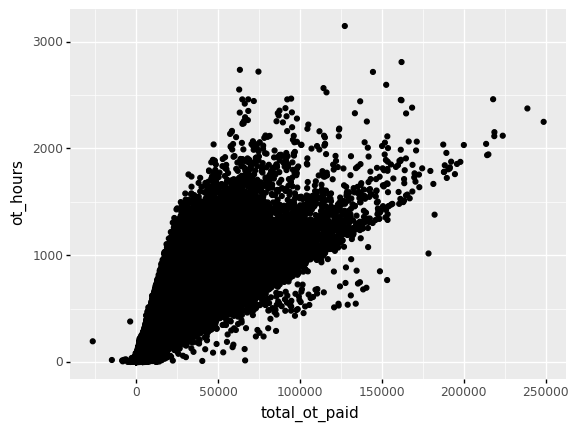

<ggplot: (313402119)>

In [9]:
chart = (
    ggplot(df.query('ot_hours > 0'),
        aes('total_ot_paid', 'ot_hours'))
        + geom_point()
)
chart.save("overtime_range.svg")
chart